<a href="https://colab.research.google.com/github/Aravind-98/Temporal-NR-GANs/blob/master/AravindanNNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "V.Aravindan"

---

# NNFL - BITS F312 - Assignment 1

Welcome to Assignment 1 of the course Neural Networks and Fuzzy Logic.

### Important instructions (read carefully) :


*  Write your code only inside the functions where "GRADED" is mentioned
*  Do not change the names of any functions
*  Do not remove any comments
*  Do not change any ungraded code
*  Sample test cases are given for testing your functions, but there will be hidden test cases as well
*  Do not delete cells in the notebook since it will be autograded.
*  Take care that you not written any extra code outside the functions which are graded
*  Make sure that you have only the original cells of the notebook while submitting 

## **Section 1 - Logistic Regression**

This is the first section of the assignment. You will implement Logistic Regression to predict the possibility of a patient getting heart disease. There is an explanation given before each code block as well as it has been mentioned what you would have to code. Read everything carefully.


Introduction:
Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. It uses the sigmoid activation function. The diagram given below will give you a brief idea. We will explain more about logistic regression as we proceed. 

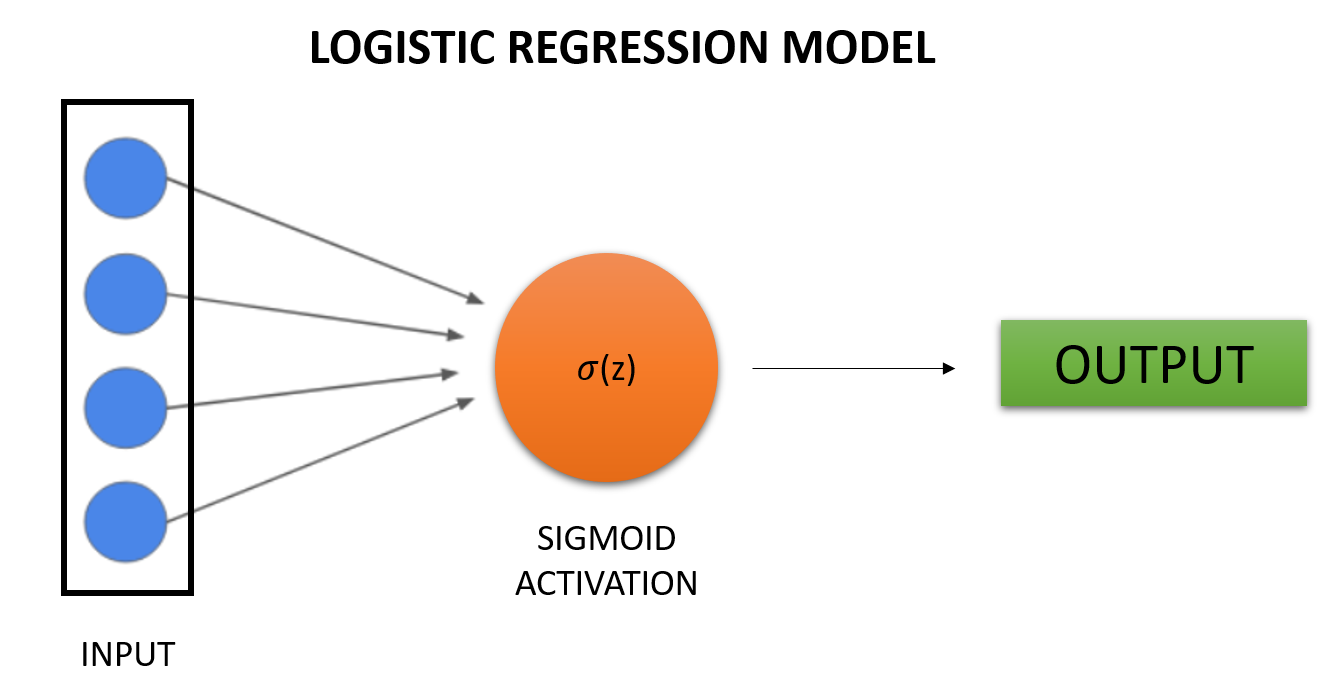



In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

#Loading the necessary packages

import numpy as np
import pandas as pd
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

#This would be required required later in the program

epsilon = 1e-5  

#### Dataset:

- Refer to the .csv file provided to you
- This database actually contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
- In particular, the Cleveland database is the only one that has been used in Machine Learning to this date. The "target" field refers to the presence of heart disease in the patient. It is binary valued with 0 (negative) and 1 (positive).
- The remaining 13 attributes of a row are the factors that will affect the presence of heart disease.
- There are 303 such rows containing data from different people
- You are encouraged to see the data for yourself after loading the dataset


In [ ]:
# GRADED - 0.25 Marks

# Load the heart dataset and return the corresponding dataframe

def load_dataset():
    # YOUR CODE HERE
    df=pd.read_csv('heart_dataset.csv')
    return df
    raise NotImplementedError()

In [ ]:
# TEST CASE

df = load_dataset()
assert df["trestbps"].loc[0] == 145
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

##### Try printing the data and look at the different types of attributes.

By looking at the data, we can understand that each attribute occupies a single column and one example occupies one row. The last column is the target column which is what we aim to predict.


##### We will now shuffle the dataset to make sure that our training/test sets are randomly chosen and are representative of the overall distribution of the data.

We'll be implementing this using sklearn.utils package

Note: We have pre-defined the random state for reproducible results for evaluation

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

from sklearn.utils import shuffle
heart_df = shuffle(df, random_state=2)

Our next step will be to split the dataset into our features X and our target (labels) values Y

In [ ]:
# GRADED - 0.25 Marks

# Get the appropriate vector X corresponding to features (factors affecting heart disease presence)
# Extract only the features X from the dataframe, and return a numpy array of shape (303, 13)

def get_features(df):
    
    # YOUR CODE HERE
    X_cols=df.columns[:-1]
    arr=df[X_cols].to_numpy()
    return arr
    raise NotImplementedError()

In [ ]:
# TEST CASE

X = get_features(heart_df)
assert X.shape == (303, 13)
assert X[0][0] == 53
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

In [ ]:
# GRADED - 0.25 Marks

# Split the dataset to get the targets(labels). Return a numpy array of size (303,1). Make sure its type is int64

def get_targets(df):
    
    # YOUR CODE HERE
    new=np.reshape(np.asarray(df[df.columns[-1]]),(-1,1))
    return new
    raise NotImplementedError()

In [ ]:
# TEST CASE

Y = get_targets(heart_df)
assert Y.shape == (303, 1)
assert Y.dtype == 'int64'
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

#### Standardization

Standardizing the data is a good practice. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Standardizing features helps us in training the model faster.

The formula for standardizing the data is given below:

$X'=\frac{X-\mu }{\sigma } $

where

$\mu $: mean of the attribute

$\sigma$: standard deviation of the attribute


Numpy provides functions to implement the above


Note: You do not need to standardize Y

In [ ]:
# GRADED - 0.5 Marks 

# Standardize X. Return the normalised X array of the same shape as input

def standardize(X):
    
    # YOUR CODE HERE
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    n=(X-mu)/sigma
    return n
    raise NotImplementedError()

In [ ]:
# TEST CASE

X = standardize(X)
assert np.allclose(X[0][0], -0.15069166)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Now we will divide our data into two parts, the training set and the test set. 

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

# 85:15 ratio of train : test to divide the datasets

X_train = np.array(X[:258])
X_test = np.array(X[258:])
Y_train = Y[:258]
Y_test = Y[258:]

Now, we will begin building the model. First, we would initialize our parameters to zeros. There are two parameters in our model:

W - The weights. This should have a shape of (13,1)

b - The bias, a scalar

In [ ]:
# GRADED - 0.25 Marks

def initialize_parameters():
    '''
    Here we will initialize the parameters to zeros
    The dimensions are:
    
    W has a shape (13,1)
    b is a scalar

    Inputs: *No input*

    Returns:
    -W: Weights of shape (13,1)
    -b: Scalar value
    '''

    # YOUR CODE HERE
    W=np.zeros((13,1))
    b=0
    return W,b
    raise NotImplementedError()

In [ ]:
# TEST CASE

W, b = initialize_parameters()
assert W.shape == (13, 1)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Now we will define the sigmoid function, which will act as a helper function.

The sigmoid function is:
$\sigma (x)=\frac{1}{1+e^{-x}}$



For a better unerstanding, the graph is given below:

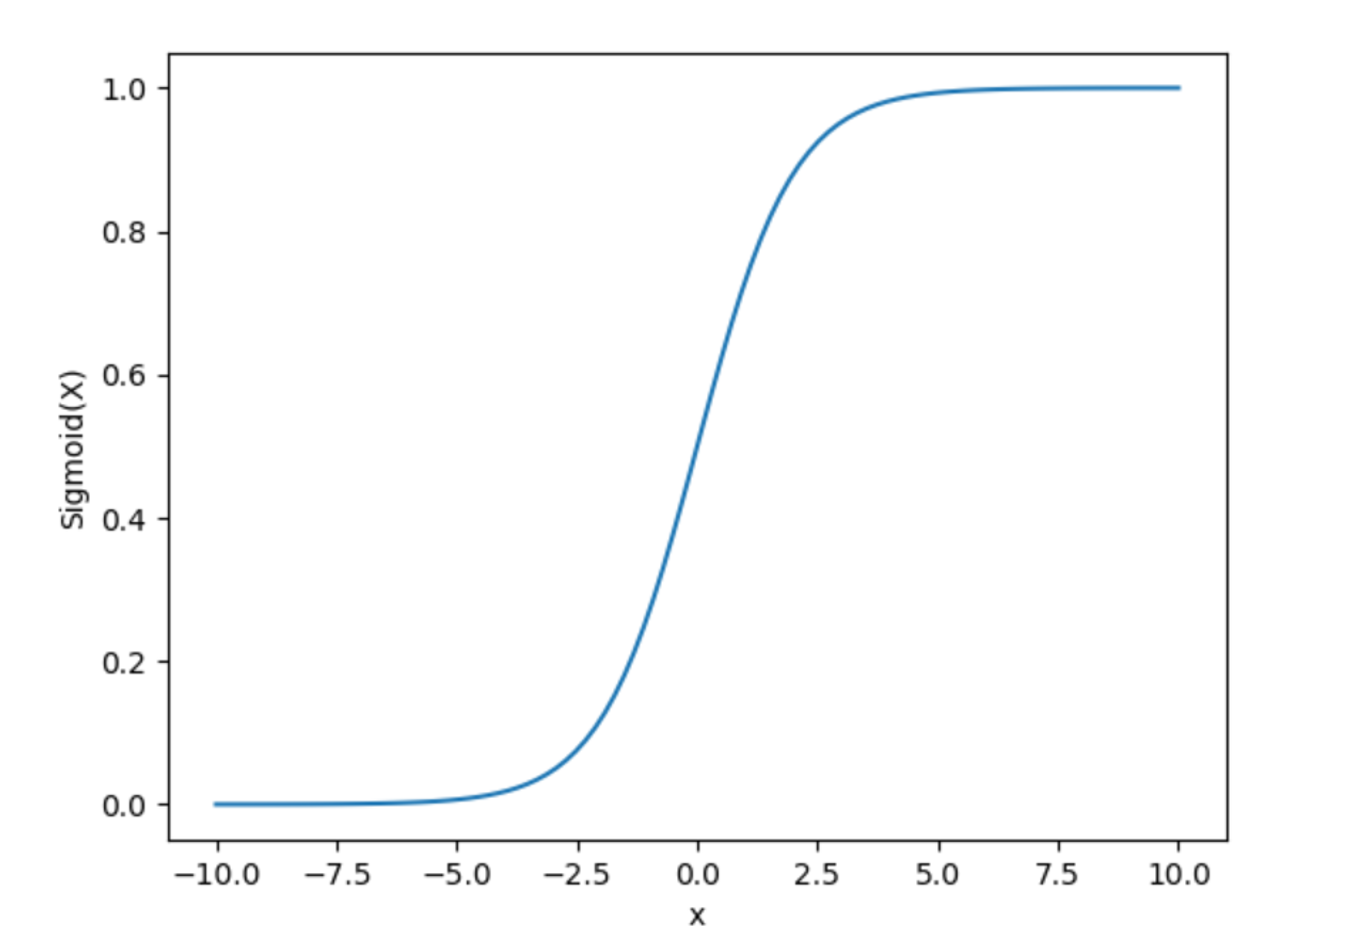

In [ ]:
# GRADED - 0.25 Marks

def sigmoid(z):
    '''
    This function is used to calculate the sigmoid of z.
    Make sure to keep the array inside the exponent of dtype='float128' so that larger values can be handled

    Input: 
    -z: The sigmoid of all the elements of z needs to be calculated. z can have any shape (1-D or 2-D numpy array), and any of int or float datatype

    Returns:
    -y: The sigmoid of z

    Note: value has the same shape as z

    '''

    # YOUR CODE HERE
    y = 1/(1+np.exp(-z,dtype='float128'))
    return y
    raise NotImplementedError()

In [ ]:
# TEST CASE

y=sigmoid(np.array([2, 5]))
assert np.allclose(y, [0.88079708, 0.99330715])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Now we will implement a function to compute the cost function and its gradient. The cost function we are using here is the **negative log likelihood cost**.

We will use the notation that superscript $^{(i)}$ would denote the $i^{th}$ example.

You can proceed using the following formulas:


$A=sigmoid(XW+b)$

The $i^{th}$ row of $A$ is $a^{(i)}=sigmoid(x^{(i)}W+b)$

Understand $a^{(i)}$ for a single example $x^{(i)}$, which is the $i^{th}$ row of X. We have implemented $A$ for all the examples in $X$ using vectorization. Vectorization is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time. We use vectorization as it is faster than using loops.

Calculate the loss of the $i^{th}$ example using:
$L(a^{(i)},y^{(i)})=-y^{(i)}log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$




Do you remember that $epsilon$ we defined at the start of ths program? We'll use that here. Add $epsilon$ to the expression inside log. This is done incase we encounter values that are very very close to zero.

The **cost function** can be caluclated as follows:


$cost=J=\frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)})$

We would also calculate the gradients of the parameters with respect to our cost function i.e. the derivative of $J$ with respect to $W$ and $b$.

$\frac{\partial J}{\partial W}=\frac{1}{m}X^{T}(A-Y)$

$\frac{\partial b}{\partial J}=\frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$


In [ ]:
dw=(1/m)*np.dot(X.T,(a-Y))
db=np.mean(a-Y,axis=0)

NameError: ignored

In [ ]:
# GRADED - 0.75 Marks

#Calculate the value of A, the cost, dw and db
def prop(X,Y,W,b):
    '''
    This function will first calculate A and then compute the cost for Logistic Regression.
    Be sure to add epsilon to the expression inside log

    Inputs:
    -X: A numpy array containing the data
    -Y: A numpy array containing the labels
    -W: A numpy array of the weights with a shape of (13,1)
    -b: A scalar for the bias

    Returns:
    -cost: The cost for logistic regression i.e. the negative log likelihood cost 
    -dw: The gradient of the loss function with respect to W. Hence, it should have the same shape as W
    -db: The gradient of the loss function with respect to b. Hence, it should have the same shape as b

    '''
    # YOUR CODE HERE
    m=X.shape[0]
    a=sigmoid(np.dot(X,W)+b)
    loss=-(Y*np.log(a+epsilon)+(1-Y)*np.log(1-a+epsilon))
    cost=np.mean(loss)
    dw=(1/m)*np.dot(X.T,(a-Y))
    db=np.mean(a-Y,axis=0)
    return cost,dw,db
    raise NotImplementedError()

In [ ]:
# TEST CASE

W = np.array([-1, 5, -3, 4, 8, -6, 7, 1, 9, -1, -6, -3, -4]).reshape(13, 1)
b = 0
cost, dw, db = prop(X_train, Y_train, W, b)
assert np.allclose(cost, 5.4423471159891791313)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Now lets implement the optimization function to learn $W$ and $b$ by minimizing the cost function $J$.

For a parameter $\theta$, the update rule is:
# $ \theta = \theta - \alpha \text{ } d\theta$,
where $\alpha$ is the learning rate.

Here we have 2 parameters to learn, namely W and b. So:

# $W = W - \alpha \text{ } dW$, 
# $b = b - \alpha \text{ } db$

In [ ]:
# GRADED - 0.5 Marks

def optimization(X,Y,W,b,learning_rate,iterations):

    '''
    This function is used to update the parameters over multiple iterations

    Inputs:
    -X: A numpy array containing the data)
    -Y: A numpy array containing the labels
    -W: A numpy array of the initial weights with a shape of (13,1)
    -b: A scalar for the initial bias
    -learning_rate: alpha as defined above
    -iterations - no of times to propagate and update weights

    Returns:
    -W: The updated weights array of shape (303,13)
    -b: The updated scalar for the bias
    -dw: The gradient of the loss function with respect to W. Hence, it should have the same shape as W
    -db: The gradient of the loss function with respect to b. Hence, it should have the same shape as b
    -costs: A list that stores the cost we have computed for each iteration
    '''
    
    # YOUR CODE HERE
    costs=[]
    for i in range(iterations):
        cost, dw, db = prop(X, Y, W, b)
        costs.append(cost)
        W=W-learning_rate*dw
        b=b-learning_rate*db
    return W,b,dw,db,costs   
    raise NotImplementedError()

In [ ]:
#TEST CASE

W = np.array([-1, 5, -3, 4, 8, -6, 7, 1, 9, -1, -6, -3, -4]).reshape(13, 1)
b = 0
W_test, b_test, dw_test, db_test, costs_test = optimization(X_train, Y_train, W, b, 0.009, 100)
assert np.allclose(W_test[0:5], [[-1.07587005], [ 4.78335974], [-2.67575355], [ 3.90123738], [ 7.84811023]])
print('Sample Test passed', '\U0001F44D')

AssertionError: ignored

In [ ]:
# HIDDEN TEST CASES




We are can use $W$ and $b$ from the previous function to predict the labels for our data. Implement the output_prediction() function.

There are two steps to computing predictions:


*   Calculate $\hat{Y} = A = \sigma(XW + b)$
*   Convert the entries of $A$ into 0 (if activation < 0.5) or 1 (if activation >= 0.5), store the predictions in a vector Y_predict.



In [ ]:
# GRADED - 0.5 Marks

def output_prediction(X, W, b):
    '''
    This function is used to predict whether a patient would have heart disease or not. We will use the following rule: 
    If the output of the ith patient is >=0.5, then the model should predict that the ith patient would have heart disease i.e. Y_predict[i]=1
    If the output of the ith patient is <0.5, then the model should predict that the ith patient would not have heart disease i.e. Y_predict[i]=0

    Inputs:
    -X: A numpy array containing the data
    -W: A numpy array of the weights with a shape of (13,1)
    -b: A scalar for the bias

    Returns:
    -Y_predict: An array containing the predicted output (0 or 1) for each input. Should have a size of (no of examples,1)
    '''

    # YOUR CODE HERE
    return np.array((np.dot(X,W)+b)>=0.5,dtype='int')
    raise NotImplementedError()

In [ ]:
# TEST CASE

Y_predict_test = output_prediction(X_train, np.array([[3],[1],[-3],[-1],[2],[3],[0],[6],[-2],[3],[-1],[2],[0]]), 0)
assert Y_predict_test.shape == (X_train.shape[0],1)
assert np.allclose(Y_predict_test[:5], np.array([[1.], [0.], [0.], [0.], [1.]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

### You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

In [ ]:
# GRADED - 0.5 Marks

# MERGE ALL FUNCTIONS INTO A MODEL
def model(X , Y, iterations=10, learning_rate=0.5):

    '''
    This is where  the entire model will come together. Call the required functions as  follows:
    1. Define and initialize the parameters W and b
    2. Optimize the parameters and store the new values of W, b, dw, db and costs
    3. Predict the output
    4. Calcluate accuracy by comparing with targets Y

    Inputs:
    -X: A numpy array containing the data
    -Y: A numpy array containing the labels
    -iterations: The number of iterations we want to run
    -learning_rate: The learning rate

    Returns:
    -accuracy: The accuracy obtained, as a percentage - based on the number of right predictions of targets Y
    -updated weights
    -updated bias

    '''

    # YOUR CODE HERE
    W, b = initialize_parameters()
    W, b, dw, db, costs = optimization(X, Y, W, b, learning_rate, iterations)
    Y_predict=output_prediction(X, W, b)
    accuracy=np.mean(Y_predict==Y)*100
    return accuracy, W, b
    raise NotImplementedError()

In [ ]:
Y_prediction=output_prediction(X_test, W, b)
accuracy= 100 - np.mean(np.abs(Y_prediction - Y_test)) * 100
accuracy


84.44444444444444

### Run the following cell to train your model, and see its accuracy for different number of iterations.

In [ ]:
# TEST CASE

accuracy, W, b = model(X_train, Y_train,iterations=10)
assert np.allclose(accuracy, 84.49612403100775)
print('Training accuracy is correct: {}'.format(accuracy), '\U0001F44D')

AssertionError: ignored

In [ ]:
# TEST CASE

Y_prediction=output_prediction(X_test, W, b)
accuracy= 100 - np.mean(np.abs(Y_prediction - Y_test)) * 100
assert np.allclose(accuracy, 82.22222222222223)
print('Test accuracy is correct: {}'.format(accuracy), '\U0001F44D')

AssertionError: ignored

In [ ]:
# HIDDEN TEST CASES

### Congrats on reaching upto this point !

You may increase the number of iterations to see the train accuracy increase a bit further. But you will notice that even if the iterations are increased to a 1000, the accuracy does not increase beyond a certain point.

This is because the model is not complex enough. A neural network helps us greatly in this regard.



## Section 2 - Neural Networks 

### Overview: (read carefully)
This section asks you to complete several functions to implement a multi layered neural network from scratch
1. Use the preprocess functions that you have already defined for the Heart Disease Dataset
2. Implement various activation functions.
3. Initialize the weight matrices and bias vectors of the neural network depending on its architecture.
4. Implement the forward propagation module.
5. Compute cross entropy loss function and L2 Regularization
6. Implement the backward propagation module to compute gradients of loss function w.r.t. weights of the network.
7. With the help of batch gradient descent optimizer, update the weights of the neural network using gradients computed in the previous step.
8. Repeat steps 3-6 for several iterations to train the neural network on the given dataset.
9. Report the accuracy of the neural network on train and test data to check for overfitting or underfitting.

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

# This cell calls the functions that you have previously defined in the previous section to read the dataset

df = load_dataset()
heart_df = shuffle(df, random_state=2)
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


### Normalization and splitting of dataset in train/test sets



In [ ]:
# GRADED - 0.5

## Normalize values only for those columns which do not have categorical data, that is age, resting blood pressure, serum cholestrol, maximum heart rate achieved, and ST depression induced by exercise

def normalise(df):
    
    # YOUR CODE HERE
    return df
    raise NotImplementedError()

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

heart_df_norm = normalise(heart_df)

In [ ]:
# TEST CASE

new_df = heart_df[10:12][["age","chol"]].copy().reset_index(drop=True)
norm_new_df = normalise(new_df)
correct_norm_new_df=pd.DataFrame({"age":[0.707107,-0.707107],
                                  "chol":[0.707107,-0.707107]})
assert np.allclose(norm_new_df.values,correct_norm_new_df.values)

print('Sample Test passed', '\U0001F44D')

In [ ]:
# HIDDEN TEST CASES

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

# Previously defined functions used to split features and targets

X = get_features(heart_df_norm)
y = get_targets(heart_df_norm)

assert X.shape == (303, 13)
assert y.shape == (303, 1)

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

## 85:15 ratio of train : test

X_train = np.array(X[:258])
X_test = np.array(X[258:])
y_train = y[:258].reshape(1,-1)
y_test = y[258:].reshape(1,-1)

A better practice to ensure the required shape of your X_train, X_test, y_train and y_test is to print these values once before proceeding to building the model.

The expected values of these are:


*   X_train - (258, 13)
*   X_test - (45, 13)
*   y_train - (1, 258)
*   y_test - (1, 45)




### Building the model

### Architecture:

A three-layer fully-connected neural network. The net has an input dimension of I, a hidden layer dimensions of H1 and H2, and performs classification over 2 classes. Hence the output layer will consist of 1 neuron.

We train the network with a sigmoid loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity after the first and second fully connected layer.

In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer - sigmoid

The outputs of the third fully-connected layer give us the results.

Step 1: A function to initialization of the parameters

In [ ]:
# GRADED - 0.5 Marks

def Initialization(I, H1, H2, O):
    '''
    Weights are initialized to random values in the range [0, 0.01) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:- 

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          W3: Third layer weights; has shape (O, H2)
          b2: Third layer biases; has shape (O, 1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters 
          after they are initialized with appropriate values in this order:
          [W1, b1, W2, b2, W3, b3]
        '''
    
    # YOUR CODE HERE
    W1=np.random.rand(H1,I)/100
    b1=np.zeros((H1,1))
    W2=np.random.rand(H2,H1)/100
    b2=np.zeros((H2,1))
    W3=np.random.rand(O,H2)/100
    b3=np.zeros((O,1))
    return [W1, b1, W2, b2, W3, b3]
    raise NotImplementedError()

In [ ]:
# TEST CASE

np.random.seed(5)
tln = Initialization(2, 3, 2, 1)
assert tln[0].shape == (3, 2)
assert tln[1].shape == (3, 1)
assert tln[2].shape == (2, 3)
assert tln[3].shape == (2, 1)
assert tln[4].shape == (1, 2)
assert tln[5].shape == (1, 1)
assert np.allclose(tln[4][0][0],0.004413092228959531)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Step 2: A function to implement forward propagation


### Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer. 
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $a^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ z^{[h]} $ be the pre-activation value. Then, $ z^{[h]} $ is computed as :
  $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $a^{[h]}$ denote post activation value. It is computed as:
  $$ a^{[h]} = g^{[h]}(z^{[h]}) $$
  Note that shape of $a^{[h]}$ is same as that of $a^{[h]}$.
  
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.

This function carries out computations of a single layer of the neural network:
 $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
 $$ a^{[h]} = g^{[h]}(z^{[h]}) $$

### Activation functions used:

$$relu(z) = max(0, z)$$
$$sigmoid(z) = 1 / (1 + e^{-z})$$

In [ ]:
# GRADED - 1.0 Marks

def feed_forward(X, parameters):
    '''
    Compute the output of a full forward pass of the network.
        
    Using the formulae given below, apply 'forward prop' for each layer according to the defined architecture

    z = WX + b
    a = g(z)  {g being the non linear function}

    Inputs:
    - X : Input data of shape (13, -1). Each X[i] is a feature and each X[:][i] is a training sample
    - parameters: List containing the parameters of the model

    Outputs:
    - y_out : Numpy array with final outputs of shape (1, -1)
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3]
    '''
    # YOUR CODE HERE
    [W1, b1, W2, b2, W3, b3]=parameters
    z1=np.dot(W1,X)+b1
    a1=sigmoid(z1)
    z2=np.dot(W2,a1)+b2
    a2=sigmoid(z2)
    z3=np.dot(W3,a2)+b3
    a3=sigmoid(z3)
    return a3,[z1,a1,z2,a2,z3,a3]
    raise NotImplementedError()

In [ ]:
np.random.seed(4)
para = Initialization(13, 3, 2, 1)
y_forward,l = feed_forward(np.transpose(X), para)
y_forward[0][0]

0.50149672903266816963

In [ ]:
# TEST CASE

np.random.seed(4)
para = Initialization(13, 3, 2, 1)
y_forward,l = feed_forward(np.transpose(X), para)
assert y_forward.shape == (1, 303)
assert np.allclose(y_forward[0][0],0.500002383924832)
assert l[0].shape==(3,303)
assert l[1].shape==(3,303)
assert l[2].shape==(2,303)
assert np.allclose(l[1][2][200],0.03278260305925719)
print('Sample Test passed', '\U0001F44D')

AssertionError: ignored

In [ ]:
# HIDDEN TEST CASES

Step 3: A function to calculate the loss

$L = \frac{1}{m} * \sum(-{yd* \log{(y\_pred)}} - (1 - yd)*\log{(1 - y\_pred)})$ <br>

where $yd$ is the desired value of y i.e. the one present in our set whereas $y\_pred$ is the value of target we have predicted, and m is the no of examples. <br> IMPORTANT: Add epsilon($eps$) inside the log function for numerical stability.


In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

eps=1e-8

In [ ]:
# GRADED - 0.5 Marks

def loss_compute(y_pred, yd):
    '''
    Inputs: 
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the 
    dataset

    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    # YOUR CODE HERE
    l=-(yd*np.log(y_pred+eps)+(1-yd)*np.log(1-y_pred+eps))
    loss=np.mean(l,dtype='float128')
    return loss
    raise NotImplementedError()

In [ ]:
loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
loss

9.21034036697618366

In [ ]:
# TEST CASE

loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
assert np.allclose(loss,9.210340366976183)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

### Regularization
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

Step 5: A function to add regularization by sum of squares so as to prevent overfitting the data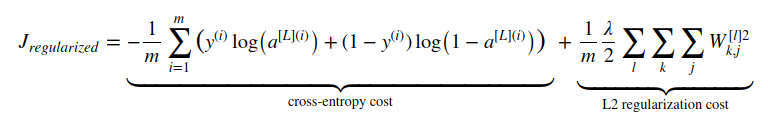

where (k, j) refer to the shape of W and l refers to the layer number

In [ ]:
# GRADED - 0.5 Marks

def regularization_L2(lmbda, W1, W2, W3, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''
    
    # YOUR CODE HERE
    total_reg_loss=(lmbda/(2*m))*(np.sum(W1**2)+np.sum(W2**2)+np.sum(W3**2))
    return total_reg_loss
    raise NotImplementedError()

In [ ]:
# TEST CASE

assert np.allclose(regularization_L2(1,np.array([[1]]),np.array([[1]]),np.array([[1]]),1),1.5)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Step 6: Making helper functions for backpropagation



Our next step will be to create some helper functions before starting backpropagation

We would need derivatives of **ReLU** function and **Sigmoid** function 

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp


Note the following rules for different activation functions:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array} 
\right.  $$
$$\frac{\partial \mathcal{(sigmoid(z))} }{\partial z} = sigmoid(z) * (1-sigmoid(z))$$




In [ ]:
# GRADED - 0.5 Marks

# Define two functions drelu and dSigmoid which return the respective derivatives
# input can be of any 1D, 2D shape

def drelu(z):
    
    # YOUR CODE HERE
    return np.array((z>=0),dtype='int')
    raise NotImplementedError()

def dSigmoid(z):
    
    # YOUR CODE HERE
    return sigmoid(z)*(1-sigmoid(z))
    raise NotImplementedError()

In [ ]:
# TEST CASE

assert np.allclose(drelu(np.array([[2,-3]])), np.array([[1,0]]))
assert np.allclose(dSigmoid(np.array([[1,-3]])), np.array([[0.19661193,0.04517666]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# HIDDEN TEST CASES

Now, we would be creating a helper function to calculate and return the values of dz, dW, and db for each layer. Refer to the formulae provided below to get a clear understanding of it's implementation.

Note that the value of **dz depends on the derivatives of activation functions** used for that layer and the functions that we have created above may come in handy.

This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:
$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$



  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$
  - $ dW_{total}^{[h]} = dW^{[h]} + dW_{reg}^{[h]} $

where $ dW_{reg}^{[h]} = \frac{1}{m} * lambda * weight^{[h]} $ 

Try to use vectorization as far as possible instead of loops as it would be simpler for you to debug

In [ ]:
# GRADED - 0.75 Marks

def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values
    
    - input: input value of that layer, for example, X is the
    input for the first layer, and for other layers, it is the activation A of the previous layer
    
    - act_fxn: string containing the name of the activation 
    function used in that layer,i.e. 'sigmoid' or 'relu' (depending on this, the appropriate function is called)
    
    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer
  
      Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer
    '''

    # YOUR CODE HERE
    if (act_fxn=='sigmoid'):
        dz=da_layer*dSigmoid(z_layer)
        
    if (act_fxn='relu'):    
    raise NotImplementedError()

In [ ]:
dz=da_h*dSigmoid(z_h)
dz.shape

(2, 1)

In [ ]:
# TEST CASE

m=1
# previous layer has 2 neurons and current layer has 2 neurons
z_h=np.array([[1],[2]])
da_h=np.array([[0.1],[0.2]])
inp=np.array([[1],[0]])
weights=np.array([[1,1],[2,0]])
dz, dW, db = back_prop_linear(da_h, z_h, inp, 'relu' , m, 1, weights)
assert np.allclose(dz,np.array([[0.1],[0.2]]))
assert np.allclose(dW,np.array([[1.1,1],[2.2,0]]))
assert np.allclose(db,np.array([[0.1],[0.2]]))
print('Sample Test passed', '\U0001F44D')

NameError: ignored

In [ ]:
# HIDDEN TEST CASES

Next we would need a helper function to calculate the derivatives of activation function variables

We will calculate dA for the last layer separately in the subsequent function.

For all other layers, we proceed as follows : 



Using this formula $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$


  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$

In [ ]:
# GRADED - 0.25 Marks

def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable
    '''
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE

# next layer has 2 neurons and current layer has 1, training samples=1
der=back_prop_actf(np.array([[1],[2]]), np.array([[2],[3]]))
assert np.allclose(der,np.array([[8]]))
print('Sample Test passed', '\U0001F44D')

In [ ]:
# HIDDEN TEST CASES

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = sigmoid(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -(Y / A^{[H]} - (1-Y)/(1-A^{[H]}))$$
where $ "/" \ denotes \ elementwise \ division$

Remember: This is only for the last layer, use the above helper function for the other layers.

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

Refer to the architecture to decide which activation function to pass as parameter to back_prop_linear at each step

In [ ]:
# GRADED - 1.25 Marks

def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: list containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','db1','dW2','db2','dW3','db3' 
    '''
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE

grads_check ={'dW1': np.array([[0.00049854, 0.00028864],[0.00048778, 0.00035884]]),
 'dW2': np.array([[3.58441488e-04, 1.18717485e-04],[5.04596997e-04, 2.14579702e-05]]),
 'dW3': np.array([[0.00016202, 0.00025462]]),
 'db1': np.array([[2.82496064e-11],[2.69695599e-12]]),
 'db2': np.array([[1.18914867e-09],[2.04374633e-09]]),
 'db3': np.array([[4.70052008e-07]])}

np.random.seed(4)
parameters = Initialization(2, 2, 2, 1)
X = np.array([[1,2],[2,3]])
y_pred, l = feed_forward(X, parameters)
grads = Backpropagation1(X, np.array([[1,0]]), l, y_pred, parameters, lmbda = 0.1)
for key in grads_check.keys():
    assert np.allclose(grads_check[key],grads[key]) 
print('Sample Test passed', '\U0001F44D')

In [ ]:
# HIDDEN TEST CASES

The weights are now updated in each iteration via the learning rules:

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

- We are done with most of the code now, yet there is the most important function left to be created - where we will be training our model.

- Refer to the overview again before writing a code for this function.

- You will have to call the above functions repeatedly and update the weights and bias with each iteration

- The values of number of iterations(num_iters), learning rate(eta) and regularization parameter(lmbda) **have been already tuned**. If you wish to experiment on these variables for a better understanding, you are free to do so. The final result, however, will be evaluated using the values given.

In [ ]:
# GRADED - 1.25 Marks

# Make a habit to print the value of loss after a fixed number of iterations to 
# check whether your model is working well or not.

def training(X, yd, parameters, eta = 0.05, num_iters=3000, lmbda = 0.1):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - eta: learning rate
      - num_iters: number of iterations
      - lmbda: regularization parameter

      Outputs:
      - history: list of loss at the start of each iteration 
      - parameters: the final parameters 
    '''
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE

np.random.seed(4)
parameters = Initialization(2, 100, 100, 1)
losses,parameter = training(np.array([[1,2],[2,3],[1,7],[4,3],[0,2],[5,3],[1,4],[2,2],[1,5],[2,8],[1,0],[2,6],[1,4]]).T, np.array([[1,0,1,1,0,0,0,0,1,1,1,0,0]]), parameters ,eta = 0.001, num_iters=2000, lmbda = 0.1)
assert len(losses)==2000
assert np.allclose(losses[1500],0.6928225851230703)
print('Sample Test passed', '\U0001F44D')

In [ ]:
# HIDDEN TEST CASES

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

## run this cell to begin training . This may take a few minutes to run.

np.random.seed(4)
parameters = Initialization(13, 100, 100, 1)
losses, parameters_final = training(X_train.T, y_train,parameters, eta = 0.05, num_iters=3000, lmbda = 0.1)

To self-evaluate the result obtained, plot the loss function with respect to the number of iterations and rethink the algorithm if your loss function is not reaching a minimum value.

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

LAST STEP: Checking the accuracy on test and train data to check if the model is overfitting or underfitting the given data. 

- Run the forward propagation using the updated parameter values and check for the given conditions in the value of 'y' received. **If they are greater than 0.5 then the result is '1', otherwise '0'.**

Henceforth, compare the values of these 1s and 0s to 'yd' and calculate accuracies.

The accuracies you should get:

- On train - between 0.87 to 0.92
- On test - between 0.83 to 0.88

In [ ]:
# GRADED - 0.5 Marks

def predict(X, yd, parameters_final):
    '''
      Inputs:
      - X: Input features
      - yd: y desired values(labels given in dataset)
      - parameters_final: final updated values of parameters

      Outputs: 
      - Returns the accuracy 
    '''
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE

parameters=[np.array([[0.1,-0.2]]),np.array([[0]]),np.array([[0.2]]),np.array([[0]]),np.array([[0.2]]),np.array([[0.1]])]
acc=predict(np.array([[1,2,3,4],[3,2,1,-5]]),np.array([[1,0,0,0]]),parameters)
assert np.allclose(acc,0.25)

In [ ]:
# HIDDEN TEST CASES

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

acc=predict(X_train.T, y_train, parameters_final)
print("Accuracy on train is :- ", acc)
acc=predict(X_test.T, y_test, parameters_final)
print("Accuracy on test is :- ", acc)

### Congratulations for making it till here. 

You have implemented a neural network from scratch. We have the last section ahead and it is based on an interesting clustering algorithm.

## Section 3 - K-means Algorithm

In this section, you will implement k-means algorithm and you will also generate dataset on which k-means will operate.

## Introduction

Let's start with some interesting facts. Computers are not random and can't truly generate random numbers. So how do random number generators work in any programming language? The algorithm used to generate random numbers is fixed and it is called again and again to get new random numbers. How the algorithm finds the next random number from current state of generator is a different question, but what matters is that given the initial state of random number generator, it will generate same sequence of random number everytime the algorithm is called. Why? Because state of the system captures all properties of the system and it progresses in exactly same fashion, no matter when you run it. Let us see how we can generate random datasets.

### Import Packages:

**DO NOT** import any extra package from your side.

In [1]:
# DO NOT CHANGE, RUN AS GIVEN

import numpy as np
import math
import random

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Point Class
This class serves as the data structure that you will use in whole assignment. This class serves the purpose of a tuple (row) of the $n$-dimensional dataset on which you can run k-means to find clusters. 

In [2]:
# DO NOT CHANGE, RUN AS GIVEN

# Point Class, which will represent the X and Y coordinates of our dataset which we will generate

class Point:
  # Initialize X and Y coordinates of this object
  # Don't change or add new code here
    def __init__(self, X, Y): 
        self.X = X
        self.Y = Y
  
  # Specify the format in which the points should be printed. Refer to 'https://www.geeksforgeeks.org/str-vs-repr-in-python/'
    def __str__(self):
        return "(" + str(self.X) + ", " + str(self.Y) + ")"

  # Specify the format in which the points should be printed, when printing array. Refer to 'https://www.geeksforgeeks.org/str-vs-repr-in-python/'
    def __repr__(self):
        return str(self)

### Variable Set
This cell defines all the variables used later on, including the generation of dataset. You are discouraged to change the variable names and the meaning of each variable is defined clearly.

In [3]:
# DO NOT CHANGE, RUN AS GIVEN

# Variables
## Test Seed
TestSeed = 10


## Variables to define the range in which we want to generate our dataset and thus, the region of our interest on 2D plane
## This variable stores the lower left point of our 2D space in which we want to see the working of k-means
LowLeftCorner = Point(0, 0)
## This variable stores the top right point of our 2D space in which we want to see the working of k-means
TopRightCorner = Point(1000, 1000)

## Dataset Generation Variables to generate the dataset. Meaning of each variable will become clear as you proceed in assignment.
Seed = 12
# Number of points to generate as original centers of dataset
PointsCount = 10
# Standard deviation of points that will be generated around Points, whose count is defined in previous line
sd = 40
# Number of points to generate around random points whose count is defined in PointsCount
PointsPerCenter = 300


## K mean Variables - to generate initial centroids
# Seed to randomly generate points for k-means initial centroids
SeedForInitialCentroids = 9
# Number of assumed centroids
CentroidCount = 12

## Get your hands dirty

### Generate Dataset -- Step 1
First you will create the numpy array of Point class based on number of points to generate, lower left corner of 2D plane and upper right corner of 2D plane. These points will serve as the base to generate dataset. You can think of them as the expected output k-means should generate under ideal conditions. But nothing is 100% accurate in the world of ML.

In [32]:
# GRADED - 0.5 Marks

# Creates an array of Point class

# count: count of points to generate in the specified range by minPoint and maxPoint - integer
# minPoint: Represents the lower left point of our 2D space in which we want to generate random points
# maxPoint: Represents the top right point of our 2D space in which we want to generate random points

# Use np.random.uniform to calculate X-points and Y-points.
# returns an Point array of type numpy.array which containts 'count' points within box defined by minPoint and maxPoint

def GeneratePoints(count, minPoint, maxPoint):
    X_gen=np.random.uniform(minPoint.X,maxPoint.X,100)
    Y_gen=np.random.uniform(minPoint.Y,maxPoint.Y,100)
    point=zip(X_gen,Y_gen)
    genPoint=[]
    for x,y in list(point):
        genPoint.append(Point(x,y))
    return np.array(genPoint)    
    raise NotImplementedError()

In [33]:
# TEST CASE

np.random.seed(TestSeed)
OrigPoints = GeneratePoints(100, Point(0,0), Point(100, 100))
assert np.allclose([[OrigPoints[0].X, OrigPoints[0].Y], [OrigPoints[1].X, OrigPoints[1].Y]], 
                   [(77.1320643266746, 57.81364298824675), (2.07519493594015, 85.39337505004863)])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [27]:
# HIDDEN TEST CASES

### Guassian distribution
1. In probability theory, a normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is 
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$ The parameter $\mu$  is the **mean** or **expectation** of the distribution (and also its median and mode), while the parameter $\sigma$  is its **standard deviation**. The **variance** of the distribution is $\sigma ^{2}$. A random variable with a **Gaussian distribution** is said to be normally distributed, and is called a **normal deviate**.

2.  From PnS course, you know **random numbers** uniformly distributed between 0 and 1 can be used to generate random numbers of any desired distribution by passing them through the inverse cumulative distribution function (CDF) of the desired distribution.

3. CDF of guassian distribution is given by $$F(x)=\frac{1}{2}\left[1+\text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$ Implementing this CDF will be off track, so we will use the numpy function np.random.normal to generate Gaussian Distributed random numbers.

In [29]:
# GRADED - 0.25 Marks

# Creates an array of random numbers, distributed around center in Gaussian Manner

# center: a floating point number, mean of guassian distriution
# sd: Standard deviation of distribution - floating point number
# count: Number of floating numbers to generate with given center and s.d. - integer

# returns the required numpy array of randomly generated gaussian distributed numbers around center

def Gaussian1D(center, sd, count):
    return np.random.normal(center, sd, count)
    raise NotImplementedError()

#### Test code for Gaussian 1D distribution

In [30]:
# TEST CASE

np.random.seed(TestSeed)

TestPoints = Gaussian1D(0, 2, 50)
assert np.allclose(TestPoints[-5:], np.array([-0.42539528, -0.67828049, 0.62433987, 1.13030534, -0.29484052]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [31]:
# HIDDEN TEST CASES

#### Gaussian 2D Distribution
1. In probability theory and statistics, the multivariate normal distribution, multivariate Gaussian distribution, or joint normal distribution is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. We will consider the case for $2$ dimensions.

2. The standard 2D Gaussian distribution is just the product of two 1D Gaussian distributions. Keep this in mind to implement Gaussian2D function.

3. **Don't use any library function to generate 2D Guassian Distribution. You are only allowed to use Gaussian1D function you implemented earlier.**

In [36]:
# GRADED - 0.5 Marks

# Creates an 2D array of random number, distributed around mean in Gaussian Manner in 2D plane

# point: Mean of distribution : an object of type Point class which we defined at beginning. Access X coordinate using point.X and Y coordinate using point.Y
# sd: Standard deviation of distribution - floating point number. (It must be same along X and Y axis to generate circular symmetric points)
# count: Number of points to generate in 2D plane, with given center and s.d. - integer

# returns the required numpy array of randomly generated gaussian distributed Points around center (object of Point class)
# Use Gaussian 1D function

def Gaussian2D(point, sd, count):
    
    X_gen=Gaussian1D(point.X, sd, count)
    Y_gen=Gaussian1D(point.Y, sd, count)
    genP=[]
    for x,y in list(zip(X_gen,Y_gen)):
        genP.append(Point(x,y))
    return np.array(genP)    
    raise NotImplementedError()

#### Test code for Guassian 2D distribution

In [37]:
# TEST CASE

np.random.seed(TestSeed)
OrigPoints = Gaussian2D(Point(0, 0), 2, 50)

assert np.allclose([[OrigPoints[0].X, OrigPoints[0].Y], [OrigPoints[1].X, OrigPoints[1].Y]],
                  [[2.663173008259036, -0.05181067363237234], [1.430557948796811, 0.5781884076078699]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [38]:
# HIDDEN TEST CASES

### Generate Dataset -- Step 2

#### Implementation
Once you implemented Gaussian 2D function and have the array of 2D points in hand, you are ready to generate your dataset. The theme is that your array points are randomly present in the 2D plane. For each point, you will choose that point as mean of gaussian distribution and then generate new points around it using Gaussian2D function.

In [54]:
# GRADED - 0.5 Marks

# Function that will generate dataset, around 'points' with 2D Guassian Distribution, having standard Deviation 'sd' and having 'countPerCenter' number of points around each point in 'points' 

# points: 2D numpy.array of Point class
# sd: Standard deviation for guassian distribution around each point - integer (not an integer array!!)
# countPerCenter: Number of points to generate around each point

# returns the array of generated points, the final size of 1D numpy.array must be countPerCenter * points

def GenerateDataset(points, sd, countPerCenter):
    dataset=[]
    for p in list(points):
        for d in list(Gaussian2D(p, sd, countPerCenter)):
            dataset.append(d)
    print(dataset)   
    return dataset 
    raise NotImplementedError()

#### Test code for Generated Dataset

In [55]:
# TEST CASE

np.random.seed(TestSeed)
OrigPoints = np.array([Point(1, 1), Point(2, 3)])
Dataset = GenerateDataset(OrigPoints, 3, 10)
np.random.shuffle(Dataset)
assert np.allclose([[Dataset[0].X, Dataset[0].Y], [Dataset[1].X, Dataset[1].Y]],
                  [[0.9748484502144332, 4.0848222339481115], [1.1862560361026575, 6.769416791265467]])
print('Sample Test passed', '\U0001F44D')

[(4.994759512388554, 2.299078569860794), (3.1458369231952164, 4.609112121436636), (-3.6362008763338043, -1.89519701155029), (0.9748484502144332, 4.0848222339481115), (2.8640079216714414, 1.685890390373979), (-1.1602566821566906, 2.3354128384910435), (1.7965347570763586, -2.4098066354931325), (1.3256455771449083, 1.4054106353459064), (1.0128742928020997, 5.453611005509747), (0.47619936822117614, -2.239414657355828), (-3.9331848419737216, 2.1980484339792943), (-3.230116887696722, 1.3520729576835633), (2.798210492001653, 3.3981248872798537), (9.15490199213329, 1.5715739552179886), (5.3710737602282705, 6.925419242590433), (7.017866639923483, 3.5850398376992785), (2.297447647505731, 4.200629964757045), (6.193989131280726, 1.987102988743407), (1.1862560361026575, 6.769416791265467), (3.8396125545789173, 0.8040914939963764)]
Sample Test passed 👍


In [56]:
# HIDDEN TEST CASES

#### Black Box Zone
This code should not be modified. This part is meant to plot points on 2D plane.

In [57]:
# DO NOT CHANGE, RUN AS GIVEN

# Scatter Plot

# Separates the 1D array of points into tuple of X and Y points.
def DecouplePoints(Points):
    X_arr = []
    Y_arr = []

    for p in Points:
        X_arr.append(p.X)
        Y_arr.append(p.Y)

    return [X_arr, Y_arr]


# Plot the Points with color
def PlotPoints(Points, color):
    val = DecouplePoints(Points)
    plt.plot(val[0], val[1], 'o', color=color)

# Plot the points with color to each category
def PlotCategories_autoColor(Categories):
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(Categories))]
  
    PlotCategories(Categories, colors)

def PlotCategories(Categories, colors):
    for i in range(len(colors)):
        PlotPoints(Categories[i], colors[i])

### Summary - Part 1
You have completed your first step for this part of assignment. Now, we will combine what is covered till now and plot our generated dataset. Again, this code should not be modified. Now, one thing may not be clear yet. This must be the seed that you have not used till now, which we will use now.

Remember we started our assignment with some discussion on random numbers. Now it's time to reveal the secret. It must be clear that random number generating algorithm requires some initial state, from which it will proceed to produce new random numbers using algorithm. This "initial state" is set by an integer in python and have a formal name : seed. When a seed is provided, state of random number generator is determined and it will generate same set of random numbers, no matter how many times you ask for random numbers from it. So question arises how to assign different seed each time to get different results each time program is executed.

This can be done in multiple ways. We can use current date and time, perform some calculation on it to give an integer and pass it as initial seed. Another method can be user mouse speed, typing speed, number of currently running programss in RAM, system active time, etc which system can use when the program started.

We will not go into details, but by now you have a basic understanding of random numbers. Now we come to seed. When you supply same seed each time before running an algorithm, generated output will be same. So, it is the basis of passing test cases throughout this assignment.

Points : 
[(180.80594623973522, 383.99569444765785), (210.4807817306255, 357.58906338442563), (156.20880983318935, 398.14197426752503), (116.72384794487705, 394.8956574513982), (80.59847007544654, 398.77739494073677), (156.71399151892987, 387.447429029936), (125.60411848178879, 381.59121233483745), (131.68745585458365, 423.0812464763179), (108.86408835560997, 320.37736814809364), (165.13448249988764, 415.50692559997117), (183.59932680978426, 362.4551164346925), (171.53559234369894, 381.1698394659883), (109.36119819751084, 349.94878966087316), (189.72662678472983, 436.03603948267454), (166.74312019294356, 302.90023940109734), (54.64266381772683, 336.10781797878815), (177.99918679960868, 368.37927462752714), (72.72836092806406, 412.6593867500822), (108.63157627108242, 332.43969493041254), (196.46853383553741, 406.1484474148155), (180.27358399317055, 428.72709320619435), (128.38416832130616, 349.2842745173135), (118.82435874125127, 282.87412666096776), (167.99053730928125, 415.35733404097

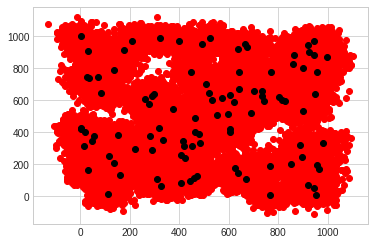

In [58]:
# DO NOT CHANGE, RUN AS GIVEN

print("Points : ")
np.random.seed(Seed)
Points = GeneratePoints(PointsCount, LowLeftCorner, TopRightCorner)
Dataset = GenerateDataset(Points, sd, PointsPerCenter)
np.random.shuffle(Dataset)

print(Points)
PlotCategories([Dataset, Points], ['red', 'black'])

## K means Implementation

### Theory Time
1. The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable.
2. Conventional k-means requires only a few steps. The first step is to randomly select $k$ centroids, where $k$ is equal to the number of clusters you choose. **Centroids** are data points representing the center of a cluster.
3. There are two steps in the process: First step is to categorize data points on the basis of nearest centroid and next step is to calculate new centroids for each category assigned to data points. Simplifying step 2, for each category, we calculate the average of points in one category and that average will serve as the centroid for next iteration. More of this will be clear soon.

### Distance metric
There are multiple distance metrics you can use to calculate distance between points in a plane. Most popular one, which you all are (must!!) familiar with is Eucledian metric. Distance between two $2$ dimensional points $P,Q \in \mathbb R ^2$ in Eucledian metric is defined as $$d\left(P,Q\right)=\sqrt{\left(x_{1}-x_{2}\right)^{2}+\left(y_{1}-y_{2}\right)^{2}}$$ where $P=(x_1,y_1)$ and $Q=(x_2,y_2)$. You can read about them in metric spaces (branch of maths) for many types of metrics and their beautiful properties, but that's not our current concern. 
Your task is to implement a function that calculates Eucledian distance between two points p1 and p2.

In [68]:
# GRADED - 0.25 Marks

# Distance between Points

# p1: point 1 - Object of Point class
# p2: point 2 - Object of Point class
# returns the eucledian distance between points

def Eucledian_Distance(p1, p2):
    
    x_diff_sq=(p1.X-p2.X)**2
    y_diff_sq=(p1.Y-p2.Y)**2
    return math.sqrt(x_diff_sq+y_diff_sq)
    raise NotImplementedError()

### Test for eucledian metric

In [69]:
# TEST CASES

val1 = Eucledian_Distance(Point(0,0), Point(3,4))
assert val1 == 5
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [70]:
# HIDDEN TEST CASES

### Statistics time!!
Afraid of statistics? Nothing to worry about. You are required to calculate average of $n$ points, nothing else. Average of $n$ Points $P_i$ is defined as $$\overline{P}=\left(\frac{1}{n}\sum_{i=1}^{n}x_{i},\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)$$ where $$P_{i}=\left(x_{i},y_{i}\right) \forall i$$

In [71]:
# GRADED - 0.25 Marks

# Calculate the average of all the points passed. 
# For e.g. Average(lst) where lst = np.array([Point(0, 0), Point(1, 2)]) and the method should return Point(0.5, 1)
# If length of Points list is 0, return Point(0, 0)

def Average(Points):
    if len(Points)==0:
        return Point(0,0)
    X=0
    Y=0
    for p in Points:
        X+=p.X
        Y+=p.Y
    return Point(X/len(Points),Y/len(Points))        
    raise NotImplementedError()

### Test
This cell will test the average function implemented above

In [72]:
# TEST CASE

Avg1 = Average([Point(1, 1), Point(2, 2)])
assert Avg1.X == 1.5 and Avg1.Y == 1.5
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [73]:
# HIDDEN TEST CASES

### End Game
This is the last and most important part of assignment.
1. You are provided with a dataset and some centroids. Your task is to calculate new centroids, such that each centroid splits the dataset into clusters. How to proceed?
2. First select a datapoint $d_i$ from $dataPoints$ array. Then calculate distance of $d_i$ from each of the centroids passed as an argument in an array $oldCentroids$ and select that centroid, which have minimum distance from data point $d_i$. In summary, first you have to split dataset on the basis of which point is close to centroid. Set of points which are close to one centroid will belong to one category.
3. Trivially, the number of categories in which each data point $d_i\in dataPoints$ is assigned will be equal to number of old centroids. Now it is required to update centroids or find new centroids based on the categories. This is super easy. You just have to calculate the average of points in each category and that will be new centroid for that category. (one question to think about: Can there exist a centroid such that no dataPoint is close to it?) 

In [104]:
# GRADED - 1.25 Marks

# Calculate new centroids
# Inputs:
## oldCentroids: 1D array of 2D points that represents the centroids in previous iteration, 
##              which we need to update in current iteration
## dataPoints: 1D array of dataset generated in previous steps, on which we are calculating centroids

# Outputs:
## newCentroids: 1D array (length same as oldCentroids) of 2D points of the new centroids of the dataset, 
##               each centroid the average of the points assigned to it
## categories: 2D array. (row length same as oldCentroids), each row contains the points assigned to that centroid

def CalNewCentroids(oldCentroids, dataPoints):
    newCentroids=[]
    categories={}
    for c in oldCentroid:
        categories[c]=[]
    for d in dataPoints:
        dist=[]
        for c in oldCentroids:
            dist.append(Eucledian_Distance(d, c))
        print(np.argmin(dist))    
        categories[np.argmin(dist)].append(d)
    for o in oldCentroid:
        newCentroids.append(Average(categories[o]))
    cat=[]
    for i in range(len(oldCentroid)):
        cat.append(np.array(categories[oldCentroid[i]]))
    return np.array(newCentroids), np.array(cat)       
    raise NotImplementedError()

### Test Time

In [98]:
OldCentroids = [Point(2, 3), Point(3, 5)]
Dataset = [Point(3, 5), Point(6, 7), Point(4, 10), Point(-5, 7), Point(8, 4), Point(-6, 2)]

NewCentroids, Categories = CalNewCentroids(OldCentroids, Dataset)

test_centroids = [Point(-5.5, 4.5), Point(5.25, 6.5)]
Categories

array([array([(-5, 7), (-6, 2)], dtype=object),
       array([(3, 5), (6, 7), (4, 10), (8, 4)], dtype=object)],
      dtype=object)

In [90]:
# TEST CASE

OldCentroids = [Point(2, 3), Point(3, 5)]
Dataset = [Point(3, 5), Point(6, 7), Point(4, 10), Point(-5, 7), Point(8, 4), Point(-6, 2)]

NewCentroids, Categories = CalNewCentroids(OldCentroids, Dataset)

test_centroids = [Point(-5.5, 4.5), Point(5.25, 6.5)]
for i in range(2):
    assert NewCentroids[i].X == test_centroids[i].X
    assert NewCentroids[i].Y == test_centroids[i].Y

test_categories = [[Point(-5, 7), Point(-6, 2)], [Point(3, 5), Point(6, 7), Point(4, 10), Point(8, 4)]]
for i in range(2):
    for j in range(len(test_categories[i])):
        assert test_categories[i][j].X == Categories[i][j].X
        assert test_categories[i][j].Y == Categories[i][j].Y

print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [91]:
# HIDDEN TEST CASES

### Plotting the results
Here is your final cell, which will decide how you performed. It generates a random dataset and old centroids and then after calling the above function repeatedly to achieve convergence, plots the final centroids and the related points by cateogry (colors assigned automatically)

In [105]:
# DO NOT CHANGE, RUN AS GIVEN

np.random.seed(Seed)
Points = GeneratePoints(PointsCount, LowLeftCorner, TopRightCorner)
Dataset = GenerateDataset(Points, sd, PointsPerCenter)
np.random.shuffle(Dataset)

np.random.seed(SeedForInitialCentroids)
Centroids = GeneratePoints(CentroidCount, LowLeftCorner, TopRightCorner)

Categories = []
for i in range(100):
    Centroids, Categories = CalNewCentroids(Centroids, Dataset)

PlotCategories_autoColor(Categories)
PlotCategories([Centroids], ['black'])
PlotCategories([Points], ['red'])

[(180.80594623973522, 383.99569444765785), (210.4807817306255, 357.58906338442563), (156.20880983318935, 398.14197426752503), (116.72384794487705, 394.8956574513982), (80.59847007544654, 398.77739494073677), (156.71399151892987, 387.447429029936), (125.60411848178879, 381.59121233483745), (131.68745585458365, 423.0812464763179), (108.86408835560997, 320.37736814809364), (165.13448249988764, 415.50692559997117), (183.59932680978426, 362.4551164346925), (171.53559234369894, 381.1698394659883), (109.36119819751084, 349.94878966087316), (189.72662678472983, 436.03603948267454), (166.74312019294356, 302.90023940109734), (54.64266381772683, 336.10781797878815), (177.99918679960868, 368.37927462752714), (72.72836092806406, 412.6593867500822), (108.63157627108242, 332.43969493041254), (196.46853383553741, 406.1484474148155), (180.27358399317055, 428.72709320619435), (128.38416832130616, 349.2842745173135), (118.82435874125127, 282.87412666096776), (167.99053730928125, 415.357334040972), (82.28

KeyError: ignored

### Thoughts?
Can you think of a way to generate initial centroids such that no category is prone to being empty??